# Scraping Data

In [2]:
from requests import get
from bs4 import BeautifulSoup

In [3]:
url = "https://www.nifc.gov/fireInfo/fireInfo_stats_totalFires.html"
page = get(url).text
soup = BeautifulSoup(page, 'html.parser')

### Table Titles

In [4]:
columns_html = soup.find_all('td', class_ = 'paraBoldnoUL')
columns = [column.get_text() for column in columns_html]
columns

['Year', 'Fires', 'Acres']

### Table data

In [5]:
rows_html = soup.find_all('tr')[3:]
rows_html = [row.find_all('td') for row in rows_html]
rows = []
for row_html in rows_html:
    row = [item.get_text() for item in row_html]
    rows.append(row)
rows = rows[:37] # Select 1983 - 2019

# Clean the Data

In [6]:
# Handle type conversion
for index, row in enumerate(rows):
    for index_col, item in enumerate(row):
        rows[index][index_col] = item.replace(',','').replace('*','')

In [7]:
import pandas as pd
df = pd.DataFrame(data=rows, columns=columns)

In [8]:
for col in df:
    df[col] = df[col].astype(int)

# Plot

In [9]:
import plotly.express as px
import plotly.graph_objects as go

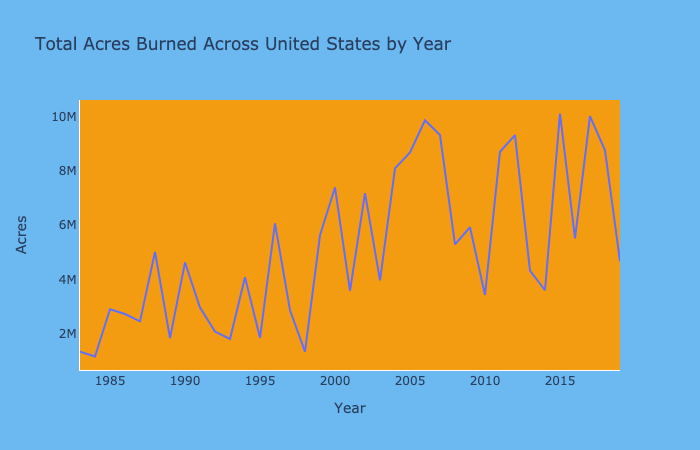

In [12]:
title = 'Total Acres Burned Across United States by Year'
fig = px.line(df, x='Year', y='Acres', title=title)
fig.update_layout(
    paper_bgcolor='rgba(107, 185, 240, 1)',
    plot_bgcolor='rgba(243, 156, 18, 1)',
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    hovermode="x unified"
)
fig.show("png")

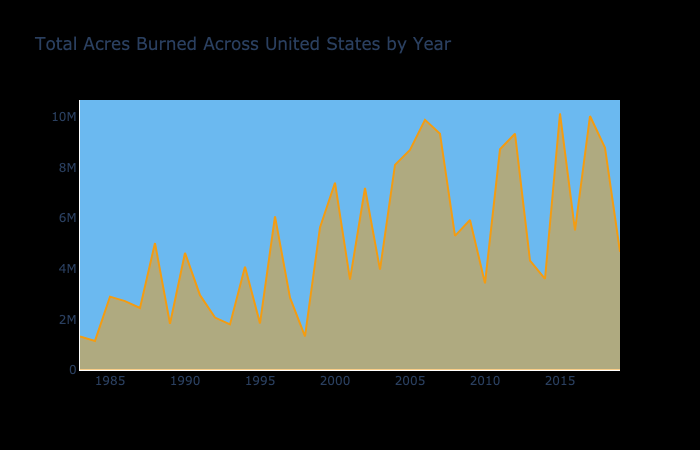

In [13]:
title = 'Total Acres Burned Across United States by Year'
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Year'], y=df['Acres'], fill='tozeroy', line_color='rgba(243, 156, 18, 1)'))
fig.update_layout(title=title, plot_bgcolor='rgba(107, 185, 240, 1)', paper_bgcolor='Black', xaxis_showgrid=False, yaxis_showgrid=False, hovermode="x unified")
fig.show("png")